In [148]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
datadir = "/content/drive/My Drive/House_prices/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [151]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.12.0
TensorFlow Decision Forests v1.3.0


In [152]:
train_file_path = "/content/drive/My Drive/House_prices/train.csv"
train = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(train.shape))
test_file_path = "/content/drive/My Drive/House_prices/test.csv"
test = pd.read_csv(test_file_path)

Full train dataset shape is (1460, 81)


In [153]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [154]:
train = train.drop('Id', axis=1)
train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-155-b5d15e55ff7a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


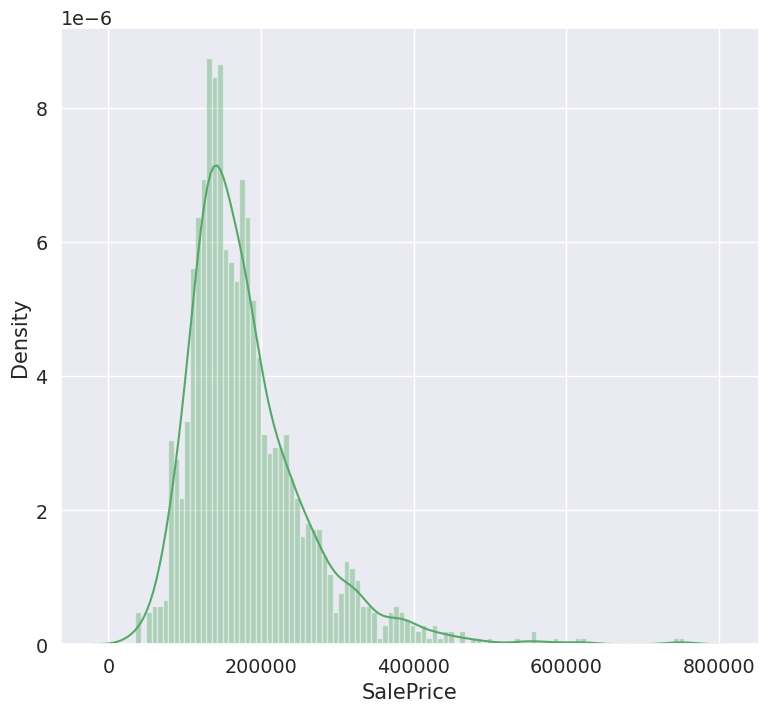

In [155]:
print(train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [156]:
train['SalePrice'] = np.log(train["SalePrice"])


count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64


<ipython-input-157-b5d15e55ff7a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


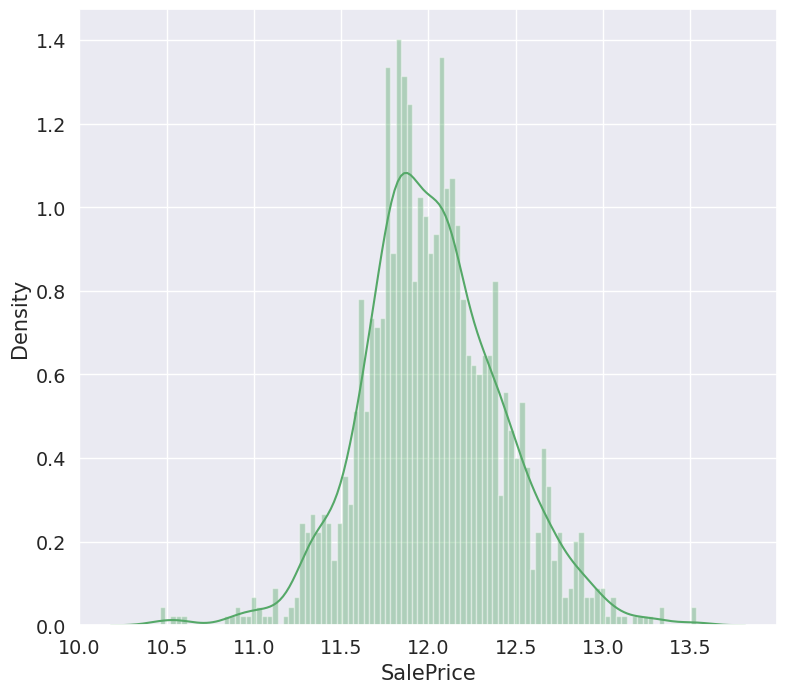

In [157]:
print(train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

<ipython-input-158-0c878ab2904d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


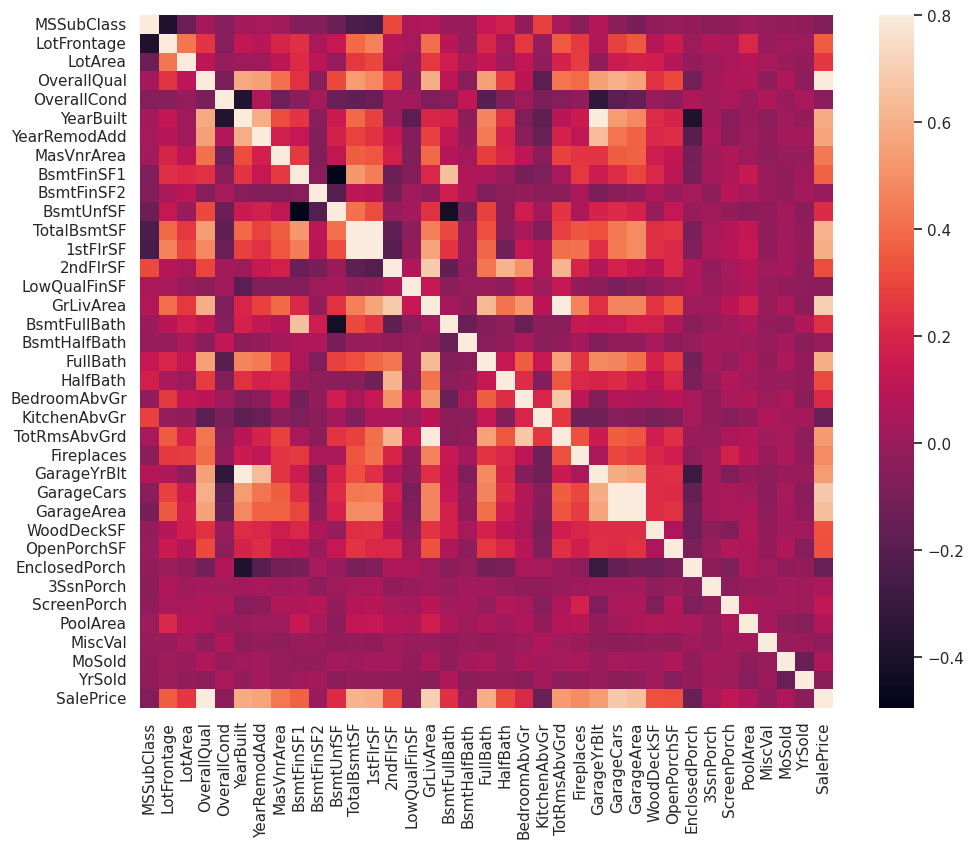

In [158]:
corr_matrix = train.corr()
?plt.subplots
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True)
?sns.heatmap

In [159]:
list(set(train.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

Features with highest correlation with SalePrice

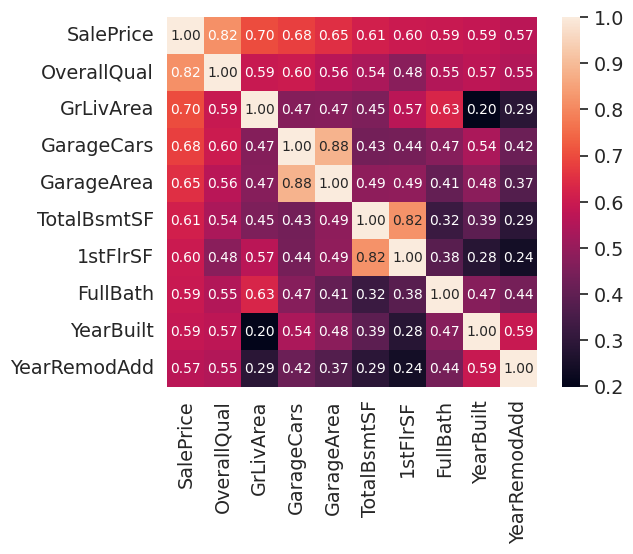

In [160]:
import numpy as np
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [161]:
# from scipy import stats
# for i in cols:
#   y1 = train_data[i]
#   plt.figure(2); plt.title('Normal')
#   sns.distplot(y1, kde=False, fit=stats.norm)
#   plt.show()
#   plt.figure(3); plt.title('Log Normal')
#   sns.distplot(y1, kde=False, fit=stats.lognorm)
#   plt.show()

In [162]:
train_num = train.select_dtypes(include = ['float64', 'int64'])
train_cat = train.select_dtypes(include = ['object'])
test_num = test.select_dtypes(include = ['float64', 'int64'])
test_cat = test.select_dtypes(include = ['object'])

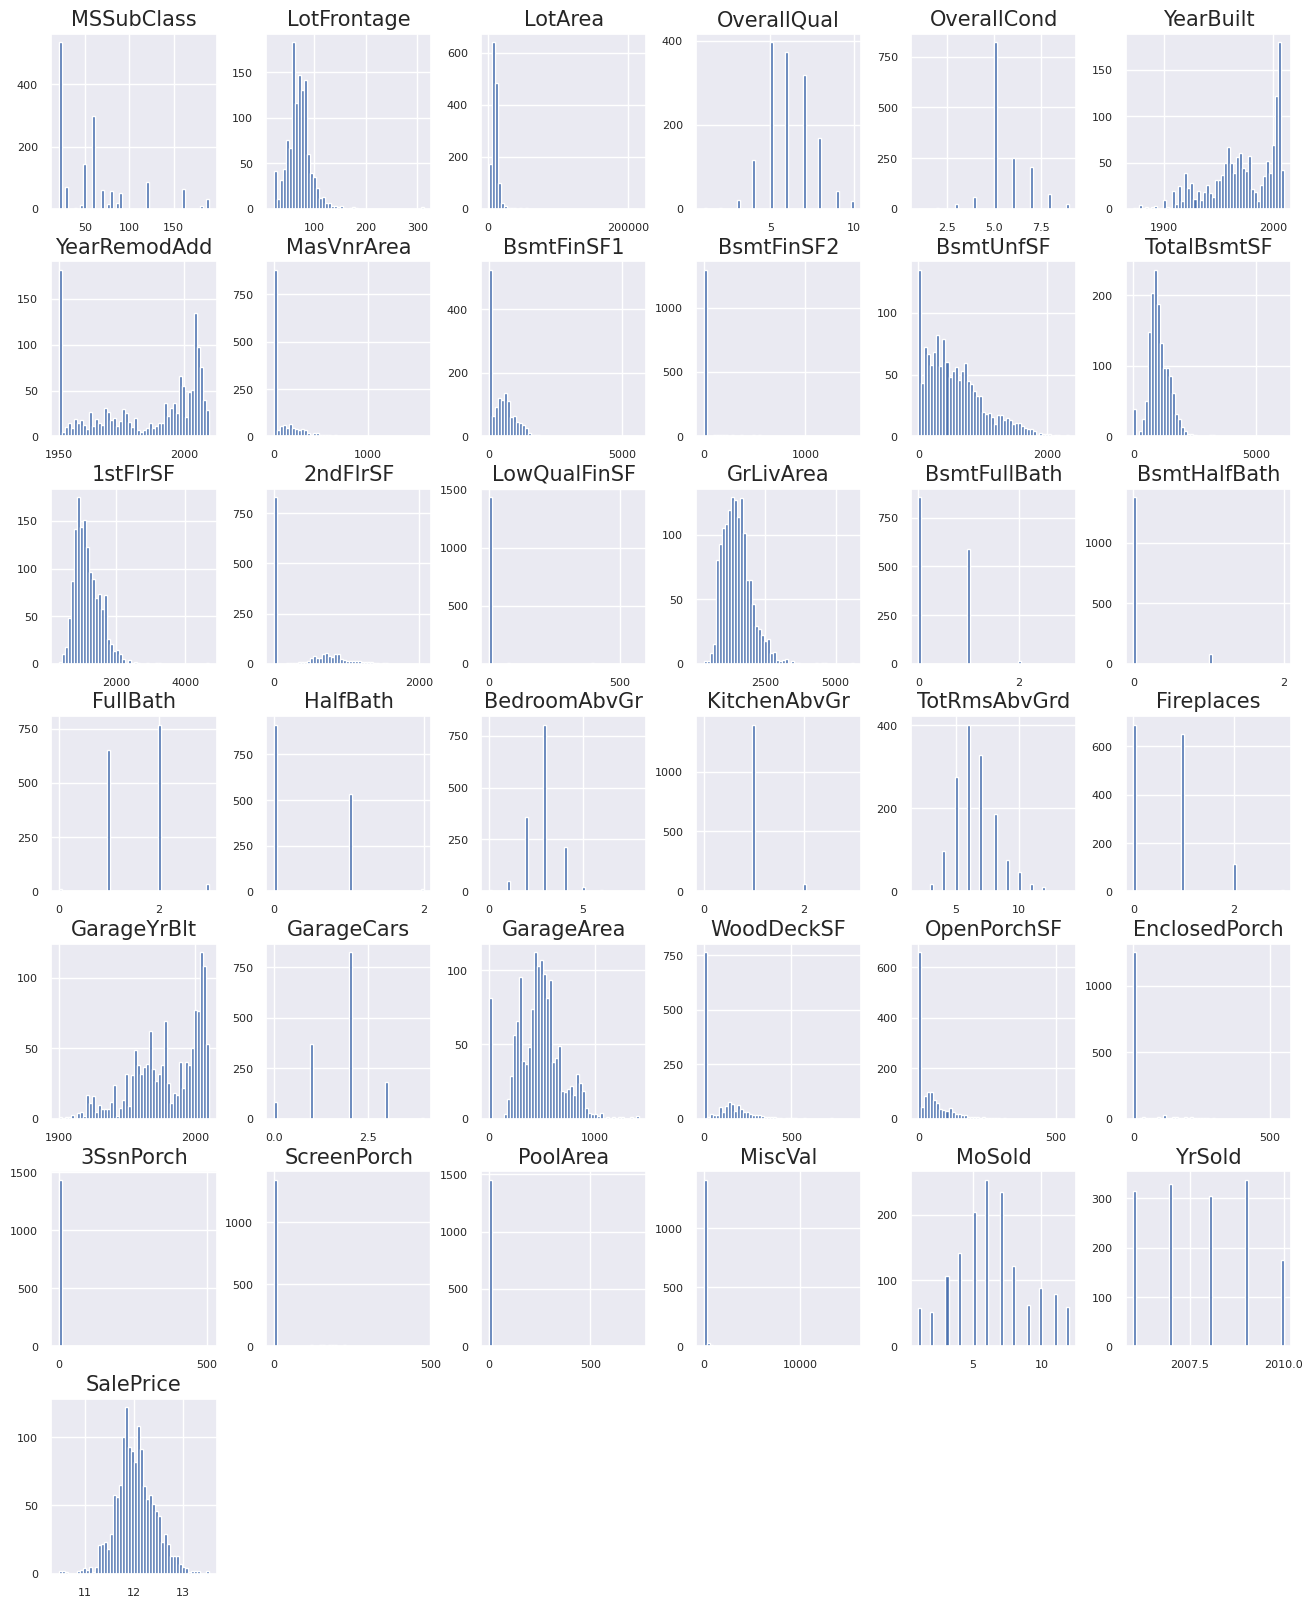

In [163]:
train_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Missing Values - Numerical Variables

In [164]:

data_len = train_num.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in train_num.columns.values:
    missing_values = train_num[col].isnull().sum()
    print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 20 missing values
    if missing_values > 20:
        #print("droping column: {}".format(col))
        train_num = train_num.drop(col, axis = 1)
        test_num = test_num.drop(col, axis = 1)
    # if there is less than 20 missing values than fill in with median valu of column
    elif col!='SalePrice':
        #print("filling missing values with median in column: {}".format(col))
        train_num = train_num.fillna(train_num[col].median())
        test_num = test_num.fillna(test_num[col].median())

MSSubClass - missing values: 0 (0.00%)
LotFrontage - missing values: 0 (0.00%)
LotArea - missing values: 0 (0.00%)
OverallQual - missing values: 0 (0.00%)
OverallCond - missing values: 0 (0.00%)
YearBuilt - missing values: 0 (0.00%)
YearRemodAdd - missing values: 0 (0.00%)
MasVnrArea - missing values: 0 (0.00%)
BsmtFinSF1 - missing values: 0 (0.00%)
BsmtFinSF2 - missing values: 0 (0.00%)
BsmtUnfSF - missing values: 0 (0.00%)
TotalBsmtSF - missing values: 0 (0.00%)
1stFlrSF - missing values: 0 (0.00%)
2ndFlrSF - missing values: 0 (0.00%)
LowQualFinSF - missing values: 0 (0.00%)
GrLivArea - missing values: 0 (0.00%)
BsmtFullBath - missing values: 0 (0.00%)
BsmtHalfBath - missing values: 0 (0.00%)
FullBath - missing values: 0 (0.00%)
HalfBath - missing values: 0 (0.00%)
BedroomAbvGr - missing values: 0 (0.00%)
KitchenAbvGr - missing values: 0 (0.00%)
TotRmsAbvGrd - missing values: 0 (0.00%)
Fireplaces - missing values: 0 (0.00%)
GarageYrBlt - missing values: 0 (0.00%)
GarageCars - missing

In [165]:
train_num.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

Missing Values - Categorical Variables

In [166]:
data_len = train_cat.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in train_cat.columns.values:
    missing_values = train_cat[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 20 missing values
    if missing_values > 20:
        print("dropping column: {}".format(col))
        train_cat=train_cat.drop(col, axis = 1)
        test_cat=test_cat.drop(col, axis = 1)
    # if there is less than 50 missing values than fill in with median valu of column
    else:
        print("filling missing values with Missing: {}".format(col))
        test_cat = test_cat.fillna('Missing')

for col in test_cat.columns.values:
      missing_values = train_cat[col].isnull().sum()
      if missing_values <= 20:
          print("filling missing values with Missing: {}".format(col))
          test_cat = test_cat.fillna('Missing')


filling missing values with Missing: MSZoning
filling missing values with Missing: Street
dropping column: Alley
filling missing values with Missing: LotShape
filling missing values with Missing: LandContour
filling missing values with Missing: Utilities
filling missing values with Missing: LotConfig
filling missing values with Missing: LandSlope
filling missing values with Missing: Neighborhood
filling missing values with Missing: Condition1
filling missing values with Missing: Condition2
filling missing values with Missing: BldgType
filling missing values with Missing: HouseStyle
filling missing values with Missing: RoofStyle
filling missing values with Missing: RoofMatl
filling missing values with Missing: Exterior1st
filling missing values with Missing: Exterior2nd
filling missing values with Missing: MasVnrType
filling missing values with Missing: ExterQual
filling missing values with Missing: ExterCond
filling missing values with Missing: Foundation
dropping column: BsmtQual
drop

In [167]:
train_cat.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
KitchenQual      0
Functional       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

Skewed Data Correction

In [168]:
from scipy.stats import skew
skewed_features = train_num.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[abs(skewed_features) > 0.5]
print(high_skew)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.676473
OpenPorchSF       2.361912
LotFrontage       2.355713
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -3.864574
dtype: float64


In [169]:
for feature in high_skew.index:
    train_num[feature] = np.log1p(train[feature])
    test_num[feature]=np.log1p(test_num[feature])

In [170]:
train_data = pd.concat([train_num, train_cat], axis=1)
test_data=pd.concat([test_num, test_cat], axis=1)


In [172]:
for col in train_data.columns.values:
    missing_values = train_data[col].isnull().sum()
    if missing_values > 10:
        print("dropping column: {}".format(col))
        train_data = train_data.drop(col, axis = 1)
    elif missing_values > 0:
        if train_data[col].dtype == 'object':
            train_data[col] = train_data[col].fillna('Missing')
        else:
            train_data[col] = train_data[col].fillna(train_data[col].median())

dropping column: LotFrontage
dropping column: GarageYrBlt


In [173]:
import numpy as np

def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

x_train, x_val = split_dataset(train_data)
print("{} examples in training, {} examples in validating.".format(
    len(x_train), len(x_val)))

1160 examples in training, 300 examples in validating.


In [175]:
label = 'SalePrice'
train_x = tfdf.keras.pd_dataframe_to_tf_dataset(x_train, label=label, task = tfdf.keras.Task.REGRESSION)
val_x = tfdf.keras.pd_dataframe_to_tf_dataset(x_val, label=label, task = tfdf.keras.Task.REGRESSION)

In [176]:
# from scipy import stats
# y1 = train_data['YearBuilt']
# plt.figure(2); plt.title('Normal')
# sns.distplot(y1, kde=False, fit=stats.norm)
# plt.figure(3); plt.title('Log Normal')
# sns.distplot(y1, kde=False, fit=stats.lognorm)

In [177]:
y = np.log(train_data["SalePrice"])

In [178]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [179]:
rf = tfdf.keras.GradientBoostedTreesModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Use /tmp/tmpcd98jwe3 as temporary training directory


In [180]:
rf.fit(x=train_x)

Reading training dataset...
Training dataset read in 0:00:03.403717. Found 1160 examples.
Training model...
Model trained in 0:00:02.381043
Compiling model...
Model compiled.


In [181]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=5)

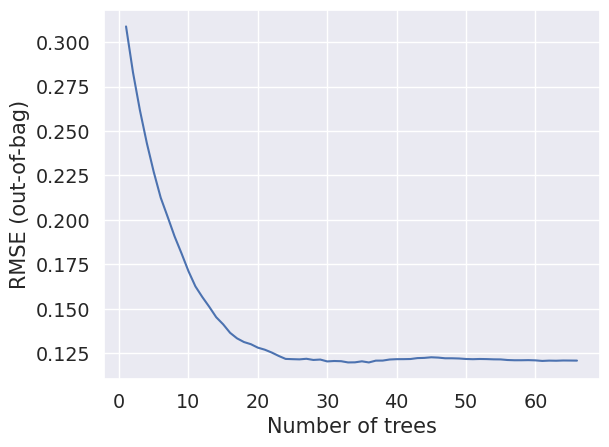

In [182]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [183]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=None, accuracy=None, loss=0.11982940137386322, rmse=0.11982940137386322, ndcg=None, aucs=None, auuc=None, qini=None)

In [184]:
evaluation = rf.evaluate(x=val_x,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 382ms/step - loss: 0.0000e+00 - mse: 0.0170
loss: 0.0000
mse: 0.0170


In [185]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


In [186]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #47), 12.0),
 ("GrLivArea" (1; #25), 8.0),
 ("YearRemodAdd" (1; #61), 5.0),
 ("Fireplaces" (1; #19), 4.0),
 ("Neighborhood" (4; #44), 3.0),
 ("KitchenQual" (4; #31), 2.0),
 ("ExterQual" (4; #16), 1.0),
 ("OpenPorchSF" (1; #45), 1.0)]

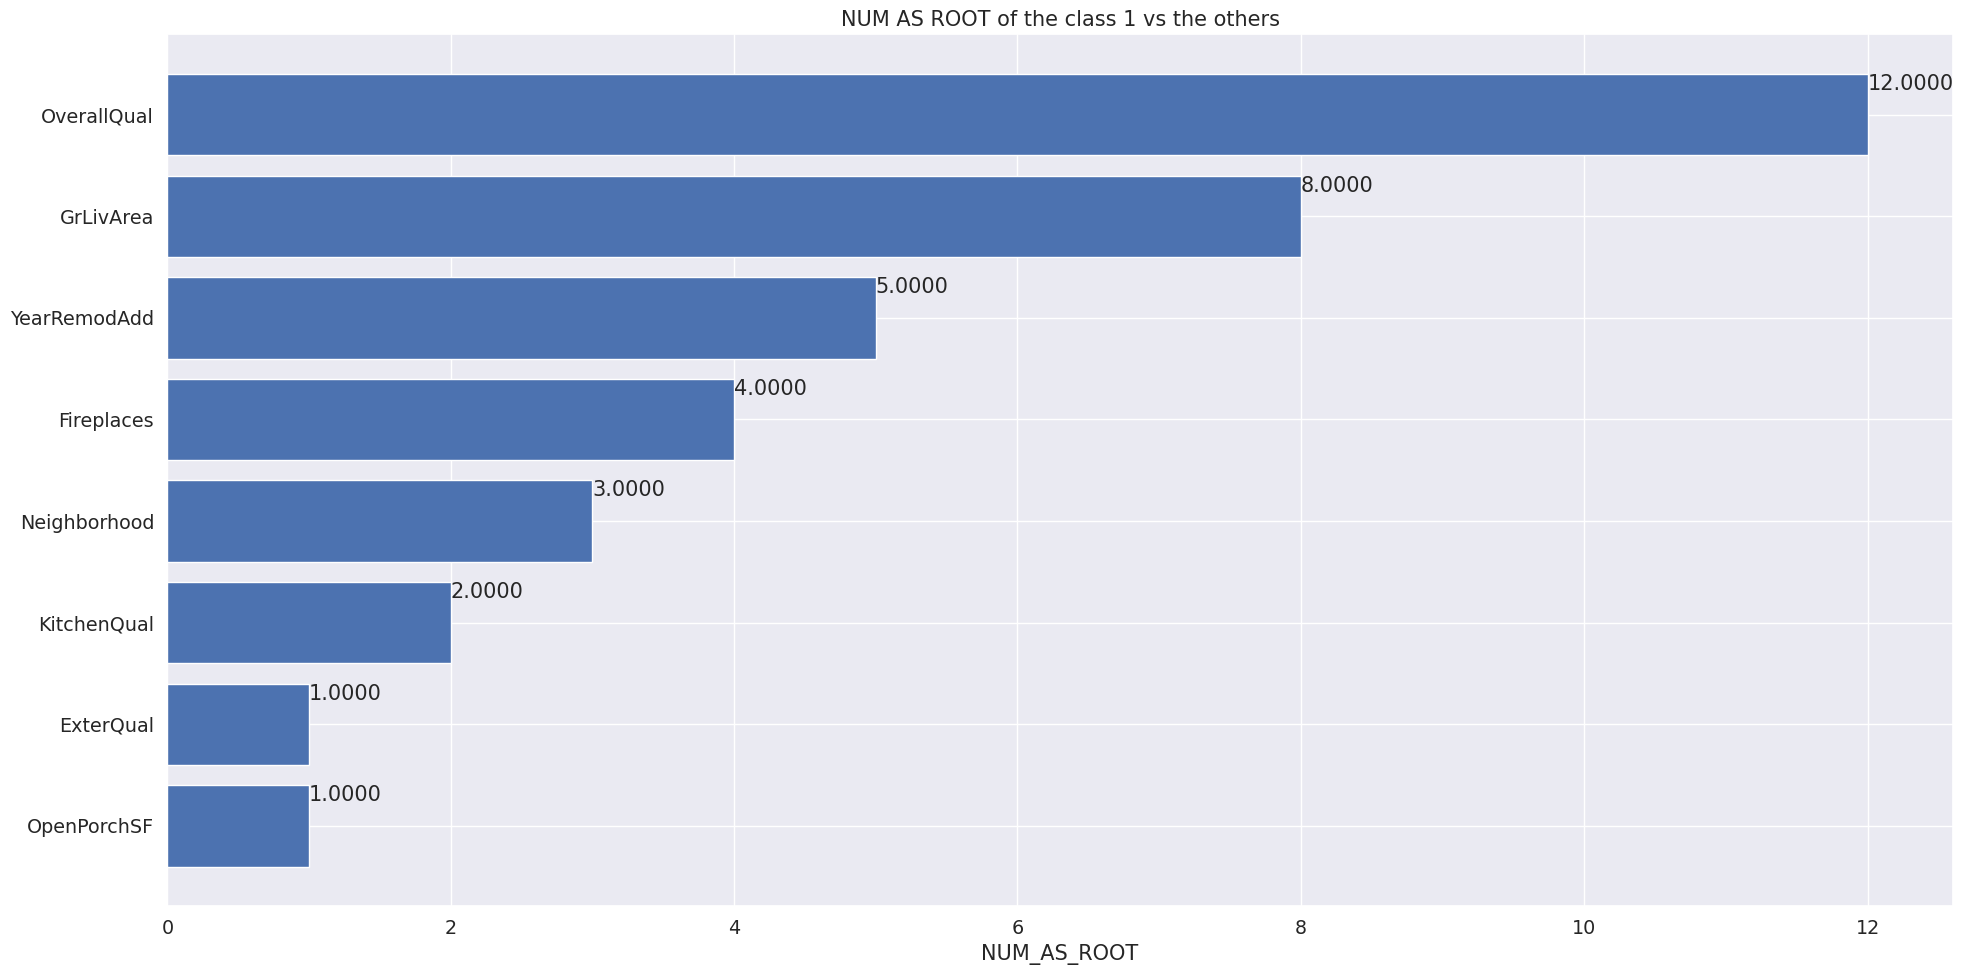

In [187]:
plt.figure(figsize=(20, 10))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [188]:
#test_file_path = "/content/drive/My Drive/House_prices/test.csv"
#test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head(100)


2/2 [==============================] - 1s 27ms/step


,Id,SalePrice
0,1461,11.731026
1,1462,11.979884
2,1463,12.141458
3,1464,12.148968
4,1465,12.192336
...,...,...
95,1556,11.608353
96,1557,11.732315
97,1558,11.520335
98,1559,11.616560


In [189]:
sample_submission_df = pd.read_csv('/content/drive/My Drive/House_prices/sample_submission.csv')
sample_submission_df['SalePrice'] = np.exp(rf.predict(test_ds))
sample_submission_df=sample_submission_df[['Id','SalePrice']]
sample_submission_df.to_csv('/content/drive/My Drive/House_prices/Submission3.csv', index=False)
sample_submission_df.head(10)

2/2 [==============================] - 0s 28ms/step


,Id,SalePrice
0,1461,124371.179688
1,1462,159513.562500
2,1463,187485.625000
3,1464,188898.984375
4,1465,197271.468750
5,1466,177461.109375
6,1467,171131.921875
7,1468,171073.171875
8,1469,184535.296875
9,1470,121333.570312
